In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [5]:
def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath)
    data['Date'] = pd.to_datetime(data['Date'])
    return data

file_path = 'Resources/TSLA_HData_5y.csv'  # Update with your file path
tesla_data = load_and_preprocess_data(file_path)
tesla_data.head()


,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,TSLA,2018-12-11,24.660667,24.811333,24.015333,24.450666,24.450666,94632000
1,TSLA,2018-12-12,24.628000,24.794001,24.344000,24.440001,24.440001,75405000
2,TSLA,2018-12-13,24.676666,25.162666,24.450001,25.119333,25.119333,110488500
3,TSLA,2018-12-14,25.000000,25.191334,24.288668,24.380667,24.380667,95064000
4,TSLA,2018-12-17,24.133333,24.379999,22.925333,23.228001,23.228001,115110000


In [8]:
def add_moving_averages(data):
    data['MA7'] = data['Close'].rolling(window=7).mean()
    data['MA30'] = data['Close'].rolling(window=30).mean()
    data['MA90'] = data['Close'].rolling(window=90).mean()
    return data

tesla_data = add_moving_averages(tesla_data)
tesla_data.head()


,Name,Date,Open,High,Low,Close,Adj Close,Volume,MA7,MA30,MA90
0,TSLA,2018-12-11,24.660667,24.811333,24.015333,24.450666,24.450666,94632000,NaN,NaN,NaN
1,TSLA,2018-12-12,24.628000,24.794001,24.344000,24.440001,24.440001,75405000,NaN,NaN,NaN
2,TSLA,2018-12-13,24.676666,25.162666,24.450001,25.119333,25.119333,110488500,NaN,NaN,NaN
3,TSLA,2018-12-14,25.000000,25.191334,24.288668,24.380667,24.380667,95064000,NaN,NaN,NaN
4,TSLA,2018-12-17,24.133333,24.379999,22.925333,23.228001,23.228001,115110000,NaN,NaN,NaN


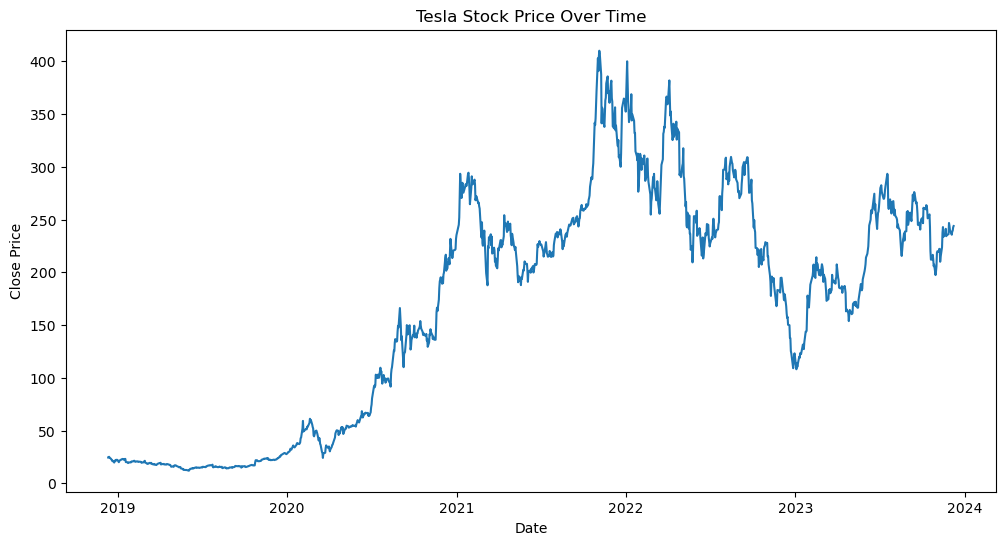

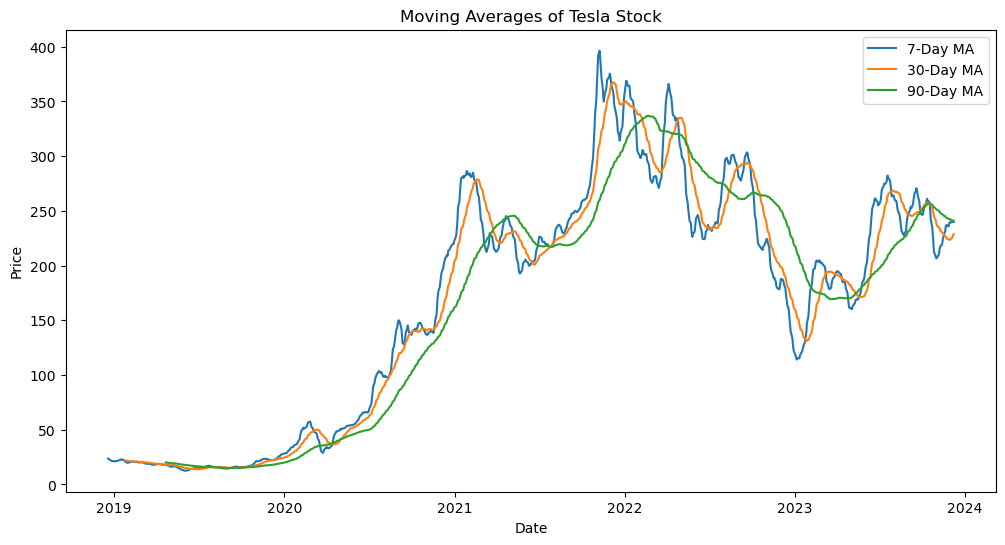

In [9]:
def perform_eda(data):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Close', data=data)
    plt.title('Tesla Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='MA7', data=data, label='7-Day MA')
    sns.lineplot(x='Date', y='MA30', data=data, label='30-Day MA')
    sns.lineplot(x='Date', y='MA90', data=data, label='90-Day MA')
    plt.title('Moving Averages of Tesla Stock')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

perform_eda(tesla_data)


In [10]:
def fit_arima_model(data, order=(1, 1, 1)):
    train_size = int(len(data) * 0.8)
    train, test = data['Close'][0:train_size], data['Close'][train_size:]

    model = ARIMA(train, order=order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test))
    return test, predictions

test, predictions = fit_arima_model(tesla_data)


In [11]:
def evaluate_model(test, predictions):
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    rmse = sqrt(mse)
    return mse, mae, rmse

mse, mae, rmse = evaluate_model(test, predictions)
print(f'Model Evaluation Metrics:\nMSE: {mse}, MAE: {mae}, RMSE: {rmse}')


Model Evaluation Metrics:
MSE: 3359.052630072831, MAE: 48.57313430237639, RMSE: 57.957334566669225


In [27]:
# Feature Engineering: Use 'Open', 'High', 'Low', 'Volume' as features
features = ['Open', 'High', 'Low', 'Volume']
X = tesla_data[features]
y = tesla_data['Close']

# Scale features for better model performance
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

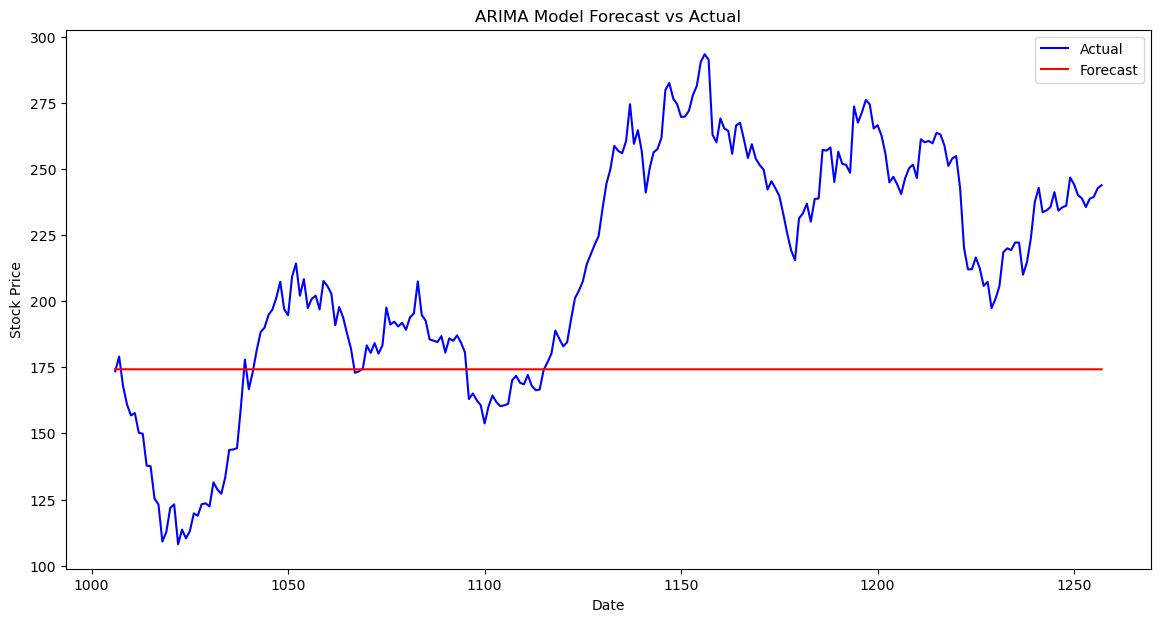

In [31]:
# Plot the actual vs forecasted values using the DatetimeIndex
def plot_with_datetime_index(test, forecast):
    plt.figure(figsize=(14, 7))
    plt.plot(test, label='Actual', color='blue')  # The index is already the date
    plt.plot(forecast, label='Forecast', color='red')  # Forecast index should match test index
    plt.title('ARIMA Model Forecast vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Call the plot function
plot_with_datetime_index(test, predictions)


In [28]:
# Model Selection: Simple Linear Regression
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)


LinearRegression()

In [29]:
# Predicting the stock prices
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)
print(f'Model Evaluation Metrics:\nMSE: {mse}, MAE: {mae}, RMSE: {rmse}')


Model Evaluation Metrics:
MSE: 10.074478104004287, MAE: 1.857726648773558, RMSE: 3.1740318372701126


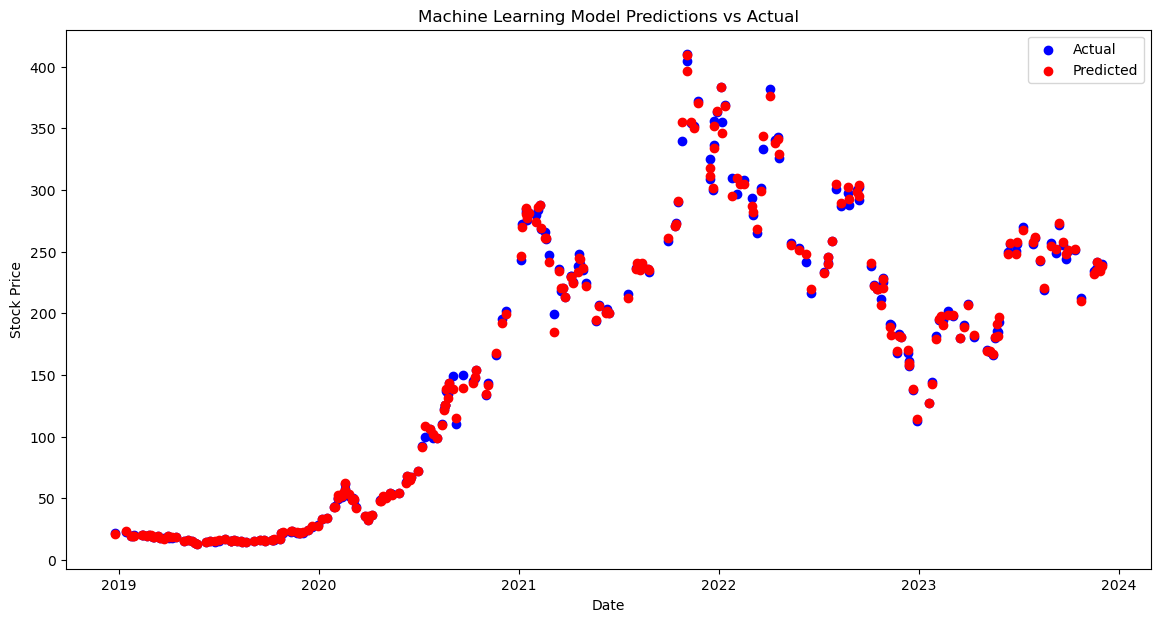

In [30]:
# Visualize the predictions vs the actual values
plt.figure(figsize=(14, 7))
plt.scatter(y_test.index, y_test, label='Actual', color='blue')
plt.scatter(y_test.index, y_pred, label='Predicted', color='red')
plt.title('Machine Learning Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
